In [9]:
import numpy as np

In [10]:
import sncosmo

In [11]:
import os

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

In [13]:
import sys
print (sys.path)

['', 'C:\\Users\\Maddi\\Anaconda3\\python35.zip', 'C:\\Users\\Maddi\\Anaconda3\\DLLs', 'C:\\Users\\Maddi\\Anaconda3\\lib', 'C:\\Users\\Maddi\\Anaconda3', 'C:\\Users\\Maddi\\Anaconda3\\lib\\site-packages', 'C:\\Users\\Maddi\\Anaconda3\\lib\\site-packages\\Sphinx-1.5.1-py3.5.egg', 'C:\\Users\\Maddi\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\Maddi\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\Maddi\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\Maddi\\Anaconda3\\lib\\site-packages\\setuptools-27.2.0-py3.5.egg', 'C:\\Users\\Maddi\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Maddi\\.ipython']


In [14]:
import analyzeSN as ans
from analyzeSN import LightCurve, ResChar

In [15]:
import sncosmo

In [16]:
print(sncosmo.__file__)

C:\Users\Maddi\Anaconda3\lib\site-packages\sncosmo\__init__.py


In [17]:
print (sncosmo.__version__)

1.4.0


## Read in light Curves

The light curves for JLA are available [from the JLA page](http://supernovae.in2p3.fr/sdss_snls_jla/jla_light_curves.tgz). However a couple of them have been added to the `example_data` directory for easy demonstration.

In [18]:
sdssfname = os.path.join(ans.example_data, 'lc-SDSS14331.list')
snlsfname = os.path.join(ans.example_data, 'lc-03D1au.list')

In [19]:
os.path.exists(snlsfname)

True

In [20]:
somename = dict (a=1, b=2)
for x in somename.items() :
    print (x)

('a', 1)
('b', 2)


In [21]:
sdsslc = LightCurve.fromSALTFormat(sdssfname)
snlslc = LightCurve.fromSALTFormat(snlsfname)

### Light Curve Plots

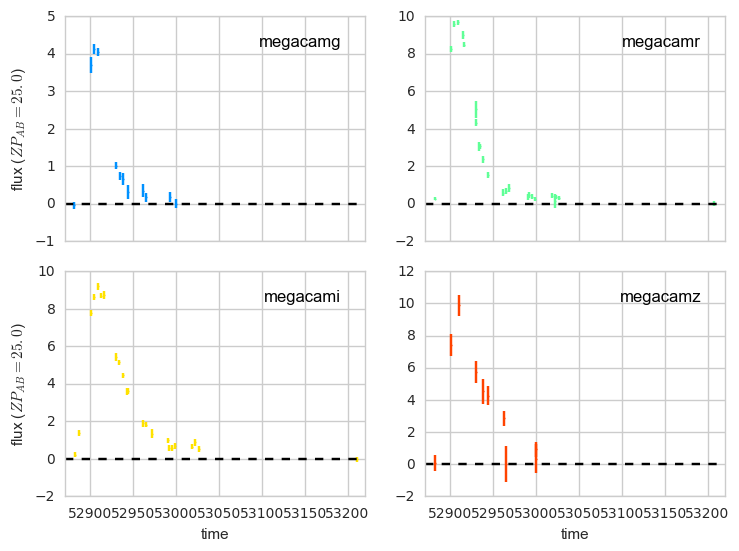

In [35]:
fig_snls = sncosmo.plot_lc(snlslc.snCosmoLC())

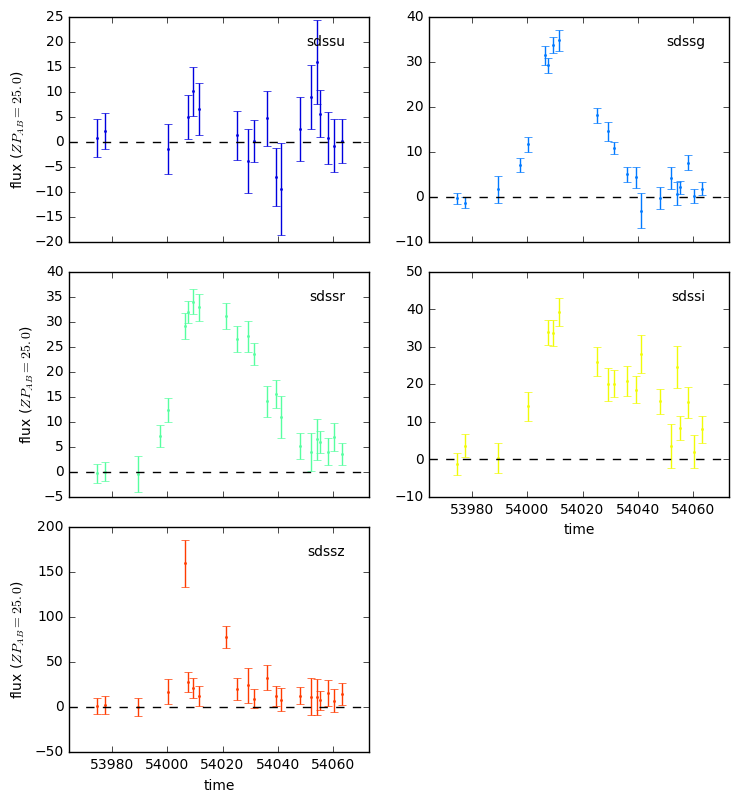

In [23]:
fig_sdss = sncosmo.plot_lc(sdsslc.snCosmoLC())

### Inference of Light Curve Model Parameters

In [24]:
import statsmodels

In [25]:
from scipy import stats

In [26]:
dust = sncosmo.CCM89Dust()
model = sncosmo.Model(source='salt2', effects=[dust], effect_names=['mw'], effect_frames=['obs'])
#model.set(mwebv=['MWEBV'])

In [27]:
model.set(mwebv=snlslc.props['MWEBV'])
model.set(z=snlslc.props['Redshift'])
snls_fitres = sncosmo.mcmc_lc(snlslc.snCosmoLC(), model=model,
                              bounds=dict(#z=(0.01,1.05), 
                                     c=(-0.5, 0.5), x1=(-5.,5.)),
                              vparam_names=['x0', 'x1', 'c', 't0'],
                              modelcov=True)

C:\Users\Maddi\Anaconda3\lib\site-packages\sncosmo\utils.py:365: UserWarning: Bandpass.dwave is deprecated in sncosmo 1.4 and will be removed in sncosmo 2.0 Use numpy.gradient(wave) with your own wavelength array.
  warnings.warn(msg)


In [28]:
snls_fitres_z = sncosmo.mcmc_lc(snlslc.snCosmoLC(), model=model, bounds=dict(z=(0.05, 0.8), c=(-0.5, 0.5), x1=(-5., 5.)),
                        vparam_names=['x0', 'x1', 'c', 't0', 'z'],
                        priors=dict(z=lambda x: stats.norm.pdf(x,0.5, 0.2)), 
                        modelcov=True)

C:\Users\Maddi\Anaconda3\lib\site-packages\sncosmo\fitting.py:133: RuntimeWarning: Dropping following bands from data: 'megacamz'(out of model wavelength range)
  "(out of model wavelength range)", RuntimeWarning)


In [29]:
mcmc_reschar = ResChar.fromSNCosmoRes(snls_fitres)
mcmc_reschar_z = ResChar.fromSNCosmoRes(snls_fitres_z)

In [39]:
mcmc_reschar.salt_samples()

,t0,x1,c,mB,mu
0,52909.097122,1.094675,-0.018581,12.346497,12.557353
1,52909.097122,1.094675,-0.018581,12.346497,12.557353
2,52909.097122,1.094675,-0.018581,12.346497,12.557353
3,52909.097122,1.094675,-0.018581,12.346497,12.557353
4,52909.164592,1.072074,-0.018841,12.347174,12.555672
5,52909.164592,1.072074,-0.018841,12.347174,12.555672
6,52909.419811,0.992060,-0.018598,12.347531,12.544073
7,52909.433448,1.028707,-0.021874,12.349505,12.561334
8,52909.433448,1.028707,-0.021874,12.349505,12.561334
9,52909.433448,1.028707,-0.021874,12.349505,12.561334


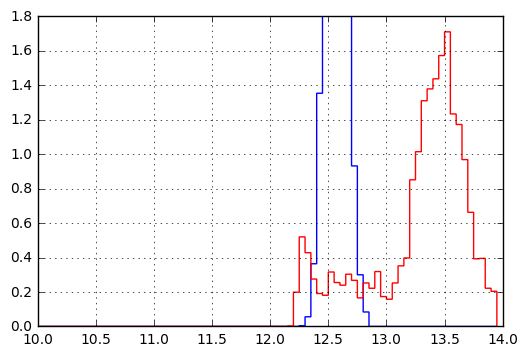

In [30]:
fig, ax = plt.subplots()
mcmc_reschar.salt_samples().mu.hist(histtype='step',
                                    bins=np.arange(10., 14.,0.05),
                                    ax=ax, normed=1)
mcmc_reschar_z.salt_samples().mu.hist(histtype='step',
                                      bins=np.arange(10., 14.,0.05),
                                      ax=ax, normed=1, color='r')


#x = np.arange(0.1, 0.4, 0.001)
#ax.plot(x, 120. *stats.norm.pdf(x, 0.213, 0.4), 'r--')

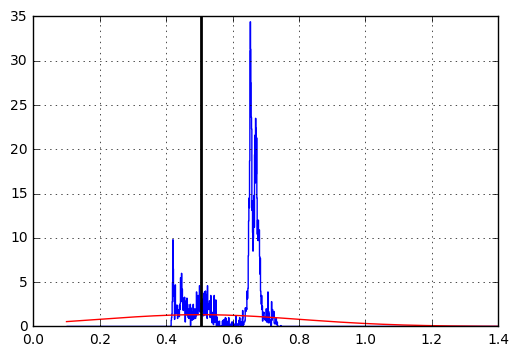

In [31]:
fig_z, ax_z = plt.subplots()
x = np.arange(0.1, 1.4, 0.001)
mcmc_reschar_z.salt_samples().z.hist(histtype='step', 
                                     bins=x,
                                     normed=1,
                                     ax=ax_z)
ax_z.plot(x, stats.norm.pdf(x, 0.5, 0.3), 'r-')
ax_z.axvline(snlslc.props['Redshift'], **dict(lw=2, color='k'))

# Scratch

In [32]:
import seaborn as sns
sns.set_style('whitegrid')

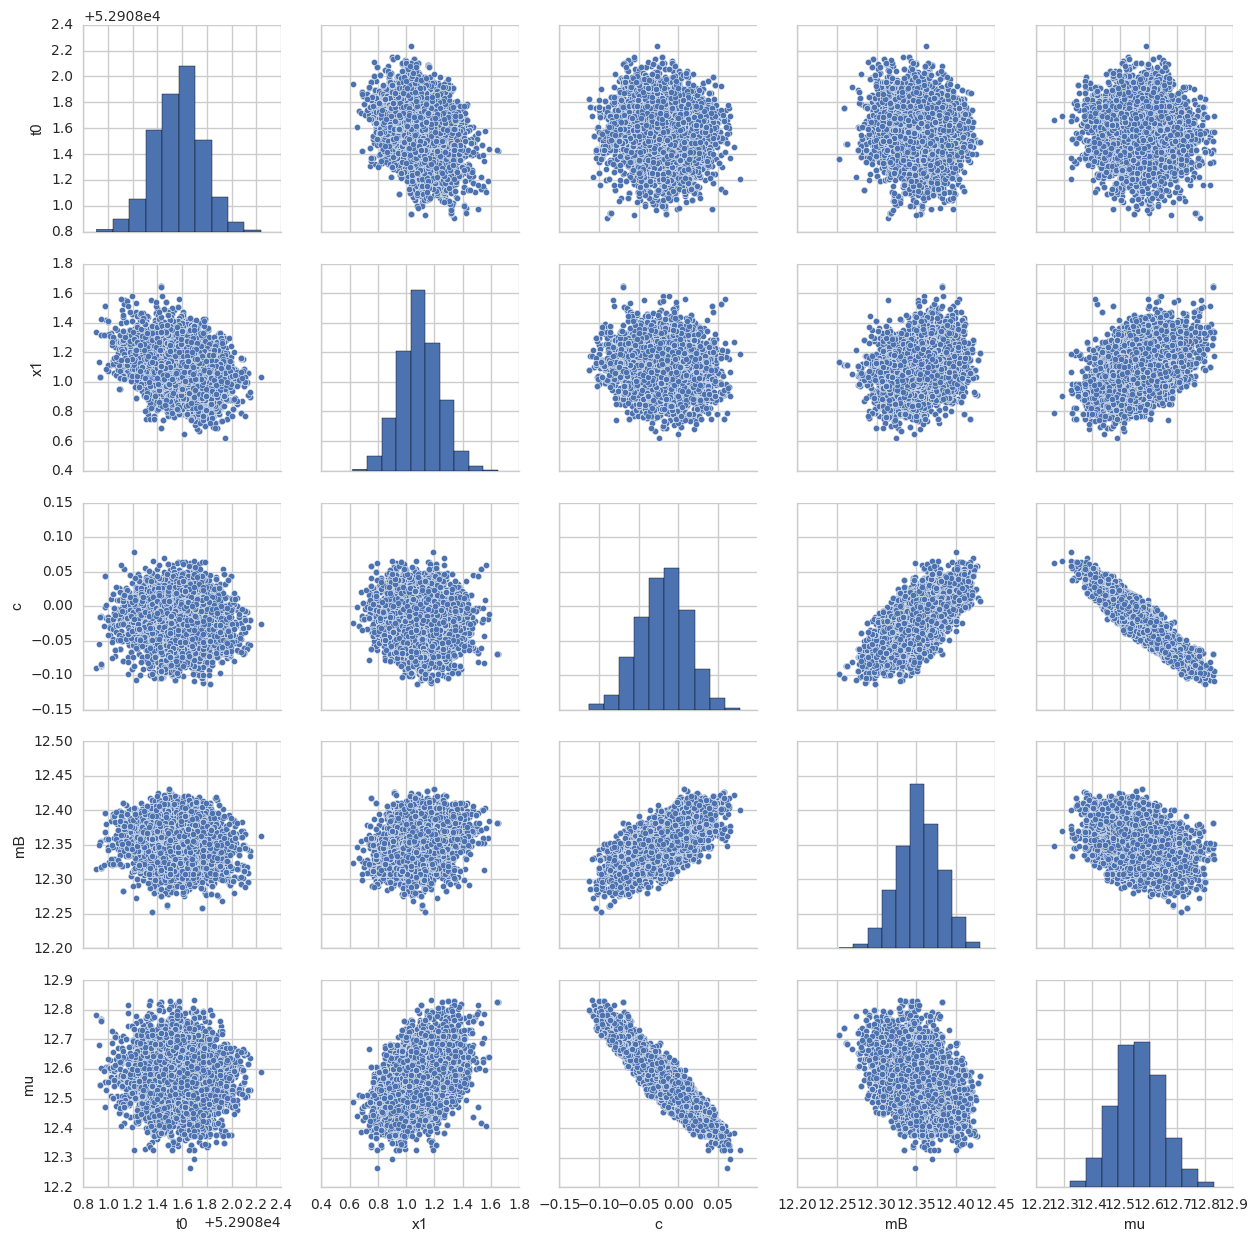

In [33]:
sns.pairplot(data=mcmc_reschar.salt_samples())

In [34]:
ResChar.fromSNCosmoRes(fitres).parameters

NameError: name 'fitres' is not defined

In [ ]:
fig = sncosmo.plot_lc(lco.snCosmoLC(), model=fitres[1])

In [ ]:
fig

## Setting model parameters from JLA_paramslc.txt by hand

In [ ]:
model.set(x1=0.141351)
model.set(z=0.213)
model.set(c=0.0142)

In [ ]:
print model

In [ ]:
fitres_JLAparams = sncosmo.fit_lc(lco.snCosmoLC(), model=model, vparam_names=['x0', 't0'], modelcov=True)

In [ ]:
fitres_JLAparams[0].parameters

In [ ]:
fig = sncosmo.plot_lc(lco.snCosmoLC(), model=(fitres[1], fitres_JLAparams[1]))

In [ ]:
fig

In [ ]:
mcmcres_JLAparams = sncosmo.mcmc_lc(lco.snCosmoLC(), model=model, vparam_names=['x0', 't0'], modelcov=True)

In [ ]:
ResChar.fromSNCosmoRes(mcmcres_JLAparams).parameters

In [ ]:
sncosmo.plot_lc(lco.snCosmoLC(), model=[fitres[1], fitres_JLAparams[1], mcmcres_JLAparams[1]], color='k')

In [ ]:
fitres_JLAparams = sncosmo.fit_lc(lco.snCosmoLC(), model=model, vparam_names=['x0', 't0'], modelcov=False, minsnr=5.)

In [ ]:
fitres_JLAparams[0].parameters